In [6]:
!pwd

/notebooks


In [7]:
all_wiktionary_data_table_path = "./repos/pfefferpflanze/data/de_wiktionary_pd.csv"

import pandas as pd

all_wiktionary_data = pd.read_csv(all_wiktionary_data_table_path, sep="|")

/tmp/ipykernel_78/2701469161.py:5: DtypeWarning: Columns (6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,42,43,44,45,46,47,48,49,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,160,161,162,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,273,274,275,276,277,278,

In [8]:
all_wiktionary_data.columns

Index(['title', 'lemma', 'inflected', 'lang', 'lang_code', 'syllables',
       'pos_Substantiv', 'ipa', 'rhymes', 'flexion_Genus',
       ...
       'flexion_mini|1|[Jahhunderthalle Bochum:] „In der Inszenierung, die den riesigen ''Bühnenraum'' der Jahrhunderthalle voll ausnützt, ist - in einer Oper sonst nicht üblich - eine Mikrofonierung der Singstimmen nötig.“<ref>{{Per-Deutsche Welle | Online',
       'flexion_mini|1|[Malzfabrik/Ering:] „Das [[alt]]e [[Gebäude]] hat seit seiner [[Stilllegung]] [[mehrmals]] die [[Besitzer]] [[wechseln|gewechselt]] und ist in einen [[stark]] ''reparaturbedürftigen'' [[Zustand]] mit [[Sanierungsstau]] [[kommen|gekommen]].“<ref>{{Per-Bayerischer Rundfunk | Online',
       'flexion_mini|1|„Aus [[Sicht]] der [[EU]] ist die [[Türkei]] [[für]] [[Flüchtling]]e ein [[sicher]]es ''Drittland,'' dabei [[flüchten]] selbst [[Türken]] aus Erdogans [[Staat]].“<ref>{{Per-Deutsche Welle | Online',
       'flexion_mini|1|„Wer der [[Vorfahrtsstraße]] [[folgen|folgt]], 

Some columns seem to be parsing errors, so we want to get rid of them to see what information is really valuable for us. In order to do so, let us get the distribution of nulls for each column. This way we can which columns should be available most of the time, hoping that these would be the ones that will contain the useful information.

In [27]:
def count_nulls(df):
    return df.isnull().sum().values

column_analysis_pd = pd.DataFrame(
    [
        {
            "colname": col_i,
            "len": len(col_i),
            "levels": len(
                [char_j for char_j in col_i if char_j == "_"]
            )
        }
        for col_i in all_wiktionary_data.columns
    ]
)
column_analysis_pd["number_nulls"] = count_nulls(all_wiktionary_data)
column_analysis_pd["nulls_ratio"] = column_analysis_pd["number_nulls"] / all_wiktionary_data.shape[0]

In [28]:
column_analysis_pd.head()

,colname,len,levels,number_nulls,nulls_ratio
0,title,5,0,4,0.000005
1,lemma,5,0,3,0.000004
2,inflected,9,0,0,0.000000
3,lang,4,0,0,0.000000
4,lang_code,9,1,0,0.000000


<AxesSubplot:xlabel='len', ylabel='nulls_ratio'>

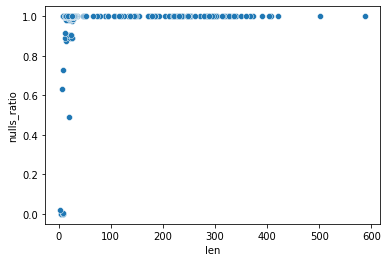

In [29]:
import seaborn as sns

sns.scatterplot(
    x="len",
    y="nulls_ratio",
    data=column_analysis_pd
)

<AxesSubplot:xlabel='number_nulls', ylabel='Count'>

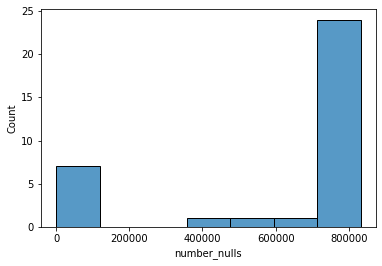

In [35]:
sns.histplot(
    column_analysis_pd[column_analysis_pd["nulls_ratio"] < 0.99]["number_nulls"]
)

In [43]:
columns_with_almost_no_nulls = column_analysis_pd[column_analysis_pd["nulls_ratio"] < 0.5]["colname"]
columns_that_are_still_useful = column_analysis_pd[column_analysis_pd["nulls_ratio"] < 0.99]["colname"]

In [45]:
columns_that_are_still_useful.values

array(['title', 'lemma', 'inflected', 'lang', 'lang_code', 'syllables',
       'pos_Substantiv', 'ipa', 'rhymes', 'flexion_Genus',
       'flexion_Nominativ Singular', 'flexion_Nominativ Plural',
       'flexion_Genitiv Singular', 'flexion_Genitiv Plural',
       'flexion_Dativ Singular', 'flexion_Dativ Plural',
       'flexion_Akkusativ Singular', 'flexion_Akkusativ Plural',
       'flexion_Genitiv Singular*', 'flexion_Dativ Singular*', 'pos_Verb',
       'flexion_Präsens_ich', 'flexion_Präsens_du',
       'flexion_Präsens_er, sie, es', 'flexion_Präteritum_ich',
       'flexion_Partizip II', 'flexion_Konjunktiv II_ich',
       'flexion_Imperativ Singular', 'flexion_Imperativ Plural',
       'flexion_Hilfsverb', 'pos_Deklinierte Form', 'pos_Adjektiv',
       'flexion_Positiv', 'flexion_Imperativ Singular*'], dtype=object)

In [46]:
columns_with_almost_no_nulls.values

array(['title', 'lemma', 'inflected', 'lang', 'lang_code', 'syllables',
       'ipa', 'pos_Deklinierte Form'], dtype=object)

In [47]:
all_wiktionary_data[columns_with_almost_no_nulls.values]

,title,lemma,inflected,lang,lang_code,syllables,ipa,pos_Deklinierte Form
0,Hallo,Hallo,False,Deutsch,de,"['Hal', 'lo']",['haˈloː'],NaN
1,Subfamilia,Subfamilia,False,Deutsch,de,"['Sub', 'fa', 'mi', 'lia']",NaN,NaN
2,Subregnum,Subregnum,False,Deutsch,de,"['Sub', 'reg', 'num']",['zʊpˈʁeːɡnʊm'],NaN
3,Subdivisio,Subdivisio,False,Deutsch,de,"['Sub', 'di', 'vi', 'sio']",['zʊpdiˈviːzi̯o'],NaN
4,Phylum,Phylum,False,Deutsch,de,"['Phy', 'lum']",['ˈfyːlʊm'],NaN
...,...,...,...,...,...,...,...,...
842324,Drohanrufer,Drohanrufer,False,Deutsch,de,"['Droh', 'an', 'ru', 'fer']",NaN,NaN
842325,inaktuell,inaktuell,False,Deutsch,de,"['in', 'ak', 'tu', 'ell']",NaN,NaN
842326,unaktuell,unaktuell,False,Deutsch,de,"['un', 'ak', 'tu', 'ell']",NaN,NaN
842327,Überreichweite,Überreichweite,False,Deutsch,de,"['Über', 'reich', 'wei', 'te']",NaN,NaN


In [49]:
all_wiktionary_data[columns_that_are_still_useful.values].head(5).T

,0,1,2,3,4
title,Hallo,Subfamilia,Subregnum,Subdivisio,Phylum
lemma,Hallo,Subfamilia,Subregnum,Subdivisio,Phylum
inflected,False,False,False,False,False
lang,Deutsch,Deutsch,Deutsch,Deutsch,Deutsch
lang_code,de,de,de,de,de
syllables,"['Hal', 'lo']","['Sub', 'fa', 'mi', 'lia']","['Sub', 'reg', 'num']","['Sub', 'di', 'vi', 'sio']","['Phy', 'lum']"
pos_Substantiv,[],[],[],[],[]
ipa,['haˈloː'],NaN,['zʊpˈʁeːɡnʊm'],['zʊpdiˈviːzi̯o'],['ˈfyːlʊm']
rhymes,['oː'],NaN,NaN,NaN,['yːlʊm']
flexion_Genus,n,f,n,f,n


In [54]:
# all_wiktionary_data[~all_wiktionary_data["flexion_Genus"].isnull()][["title", "flexion_Genus"]].to_csv(
#     "./repos/pfefferpflanze/data/de_wiktionary_pd_only_gender.csv", sep="|", index=False
# )
all_wiktionary_data[~all_wiktionary_data["flexion_Genus"].isnull()][["title", "flexion_Genus"]]

,title,flexion_Genus
0,Hallo,n
1,Subfamilia,f
2,Subregnum,n
3,Subdivisio,f
4,Phylum,n
...,...,...
842319,Bran,f
842321,Drohbriefschreiber,m
842323,Festnetzanschluss,m
842324,Drohanrufer,m


In [55]:
# all_wiktionary_data[columns_that_are_still_useful].to_csv(
#     "./repos/pfefferpflanze/data/de_wiktionary_pd_summarized_version.csv", sep="|", index=False
# )
all_wiktionary_data[columns_that_are_still_useful].head()

,title,lemma,inflected,lang,lang_code,syllables,pos_Substantiv,ipa,rhymes,flexion_Genus,...,flexion_Präteritum_ich,flexion_Partizip II,flexion_Konjunktiv II_ich,flexion_Imperativ Singular,flexion_Imperativ Plural,flexion_Hilfsverb,pos_Deklinierte Form,pos_Adjektiv,flexion_Positiv,flexion_Imperativ Singular*
0,Hallo,Hallo,False,Deutsch,de,"['Hal', 'lo']",[],['haˈloː'],['oː'],n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Subfamilia,Subfamilia,False,Deutsch,de,"['Sub', 'fa', 'mi', 'lia']",[],NaN,NaN,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Subregnum,Subregnum,False,Deutsch,de,"['Sub', 'reg', 'num']",[],['zʊpˈʁeːɡnʊm'],NaN,n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Subdivisio,Subdivisio,False,Deutsch,de,"['Sub', 'di', 'vi', 'sio']",[],['zʊpdiˈviːzi̯o'],NaN,f,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Phylum,Phylum,False,Deutsch,de,"['Phy', 'lum']",[],['ˈfyːlʊm'],['yːlʊm'],n,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
